## Baseline Model 2

### Term Frequency-Inverse Document Frequency (TFIDF) with Multinomial Naive Bayes and Stochastic Gradient Descent (SGD) Regression¶


TF-IDF is another popular technique used in Natural Language Processing for text feature extraction. One problem with the BoW model was that highly frequent words have higher scores and begin to dominate in the matrix. These frequent words may not contribute much to the information content to clearly distinguish the words used within each star rating category. TF-IDF gives more weight to domain specific or rarer words by combining two measures: term frequency (TF) and Inverse Document Frequency (IDF). 

1. Term-frequency (TF) : measures how frequently a term (t) appears in a document, d


### TF = (Number of times term t appears in the document/ Total number of terms in the document d)


In here, the numerator is the number of time t appears in document d

For example: 

Review 1: ”This coffee tastes great and the package looks great.” 

The word "great" appeared twice in the document with total of 9 words. Therefore, the term frequency for "great" is 2/9 while the term frequency for all other words are 1/9. 

2. Inverse document frequency (IDF): measures how important a term is 


### IDF = log( Total number of documents/ Number of documents with term t in it) 



For example: 

Review 1: ”This coffee tastes great and the package looks great.” 
Review 2: "This dress looks great." 

IDF("great") = log(2/2) = log(1) = 0 

IDF("coffee") = log(2/1) = 0.3


To calculate the TFIDF of "great", we multiply the TF of "great" -> 2/9 with the IDF of "great" ->0, which returns 0

To calculate the TFIDF of "coffee", we multiply the TF of "coffee" -> 1/9 with the IDF of "coffee" ->0.3, which returns 0.03

Words with a higher score are more important, and those with a lower score are less important

For more information, please refer to: https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/



### n-grams

n-grams refers to a contiguous sequence of n items from a given sample of text or speech. Since 1-grams are sometimes insufficient to understand the grammatical structure nor the ordering of the words, n-grams can be used to understand blocks of words. 

The simplest n-gram model is bi-gram, which looks at pairs of consecutive words. For example, the review ”This coffee tastes great and the package looks great.” would have tokens "this coffee", "coffee tastes", "tastes great", ..., "looks great". 


In this TFIDF model, 1-gram and 2-gram will be used and the feature space will be reduced to 3000 most important tokens.

In [1]:
import pandas as pd
import numpy as np 
import pickle
from pickle import load
from pickle import dump
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
from matplotlib.pyplot import figure
pd.options.display.max_rows = 4000

In [2]:
train = pd.read_csv("train_data.csv")
train.head()

,overall,department,clean2
0,1.0,Snack Foods,disappointed not crispy dense no spice find go...
1,3.0,"Herbs, Spices & Seasonings",st time purchase vanilla bean not overly impre...
2,3.0,Candy & Chocolate,love version dark chocolate thought salt carme...
3,5.0,"Herbs, Spices & Seasonings",convenient
4,2.0,Beverages,taste much like peach pie not enough like tea ...


In [3]:
# Creating a term matrix with TFIDFVectorizer

tf = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=3000) # number of n-grams, use both 1-gram and bi-grams
tfidf_data = tf.fit_transform(train['clean2'])
tfidf_train = pd.DataFrame(tfidf_data.toarray(), columns=tf.get_feature_names())
dump(tf, open('TFIDF.pkl', 'wb'))
tfidf_train.head()

,able,absolute,absolutely,absolutely love,absolutely no,acceptable,accord,ache,acid,acidic,...,yogurt,young,yuck,yucky,yuk,yum,yummy,zero,zevia,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.175241,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [4]:
# Find the weights by term 
terms = tf.get_feature_names()
sums = tfidf_data.sum(axis=0)

# Connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','weights'])
print(ranking.sort_values('weights', ascending=False)[:100])

              term      weights
1030          good  3355.218137
1719           not  3313.475451
2600         taste  3127.954906
1392          like  2606.426549
887         flavor  2209.106314
1082         great  2081.237785
1486          love  1724.424503
2043       product  1613.906746
461         coffee  1475.487743
2654           tea  1307.666738
2916          well  1289.476026
2780           try  1094.761665
1829            ok  1088.258327
311            buy  1077.413765
2021         price  1072.990566
1695            no  1071.230050
1637          much  1042.093237
2132        really  1021.477771
1853         order   957.882761
1450        little   862.608689
2730          time   846.031969
153            bag   833.933808
722            eat   828.218807
146            bad   817.818239
2571         sweet   814.745358
2539         sugar   794.318020
410      chocolate   765.731785
1690          nice   727.034169
623      delicious   721.158923
2622    taste like   717.635052
267     

In [5]:
# Define training data 

X_train = tfidf_train
y_train = train['overall']

## Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB


parameters = {  
'alpha': (1, 0.1, 0.01, 0.001)  
}  

mnb = GridSearchCV(MultinomialNB(), parameters,cv=5, return_train_score=False)
mnb.fit(X_train, y_train)
print('Model best parameter is:', mnb.best_params_)
print('Model best accuracy is:', mnb.best_score_)

dump(mnb, open('Tfidf_mnb.pkl', 'wb'))

Model best parameter and accuracy are: {'alpha': 1} 0.5079374999999999


## Regression 

In [17]:
from sklearn.linear_model import SGDRegressor

regr = SGDRegressor(penalty='l2')
regr.fit(X_train, y_train)
print('R2', regr.score(X_train, y_train))


dump(regr, open('Tfidf_reg.pkl', 'wb'))

R2 0.5171784705140723


## Testing and Results

In [2]:
test = pd.read_csv("test_data.csv")
test.head()

,overall,department,clean2
0,1.0,Beverages,really excite try family love hot chocolate co...
1,2.0,Beverages,taste good omg price outrageous not purchase h...
2,5.0,Beverages,add powder mixture reusable k cup add coffee m...
3,1.0,Snack Foods,try similar product love figure love wrong hus...
4,2.0,Beverages,not expect want mocha taste husband drinking l...


In [3]:
tf = load(open('TFIDF.pkl', 'rb'))
data_tf = tf.transform(test['clean2'])
tf_test = pd.DataFrame(data_tf.toarray(), columns=tf.get_feature_names())
tf_test.head()

,able,absolute,absolutely,absolutely love,absolutely no,acceptable,accord,ache,acid,acidic,...,yogurt,young,yuck,yucky,yuk,yum,yummy,zero,zevia,zip
0,0.137974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Assign the testing data

X_test = tf_test
y_test = test['overall']

## MNB Results

In [5]:
# Predict with MNB model and review results 

mnb = load(open('Tfidf_mnb.pkl', 'rb'))
y_pred_mnb = mnb.best_estimator_.predict(X_test)
mnb_results = classification_report(y_test,y_pred_mnb,digits=2)
print(mnb_results)

              precision    recall  f1-score   support

         1.0       0.57      0.63      0.60      3987
         2.0       0.42      0.40      0.41      3978
         3.0       0.45      0.40      0.43      4002
         4.0       0.47      0.46      0.47      4015
         5.0       0.63      0.67      0.65      4018

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000



[[2510  912  276  159  130]
 [1073 1607  845  313  140]
 [ 471  853 1619  766  293]
 [ 211  269  671 1846 1018]
 [ 157  160  172  833 2696]]


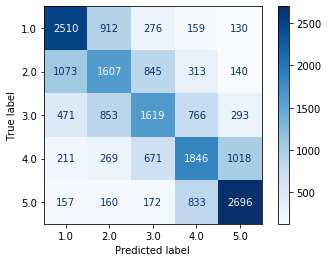

In [6]:
#plot confusion matrix 
class_names = test['overall'].unique().sort()

disp_mnb = plot_confusion_matrix(mnb, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, values_format = '.0f'
                                )
print(disp_mnb.confusion_matrix)

In [23]:
matrix = confusion_matrix(y_test, y_pred_mnb)
print(matrix)

actual, one_less, one_more  = 0, 0, 0
for i in range(len(matrix)):
    actual += matrix[i][i]
    try:
        one_less += matrix[i+1][i]
        one_more += matrix[i][i+1]
        i+=1
    except:
        one_less += 0
        one_more += 0
# print(actual, one_less, one_more)

acc_miss1 = (actual+one_less+one_more)/np.sum(matrix)
print('The accuracy with one missed step is:', acc_miss1)

[[2510  912  276  159  130]
 [1073 1607  845  313  140]
 [ 471  853 1619  766  293]
 [ 211  269  671 1846 1018]
 [ 157  160  172  833 2696]]
The accuracy with one missed step is: 0.86245


In [25]:
# new review examples
s = ['this fish taste really good','this taste terrible', 'i do not like this','coffee', 'love it']
a = tf.transform(s)
mnb.best_estimator_.predict(a)

array([5., 1., 2., 5., 5.])

## Regression Results

In [13]:
regr = load(open('Tfidf_reg.pkl', 'rb'))
y_pred_reg = regr.predict(X_test)
r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_reg,) 
mae = mean_absolute_error(y_test, y_pred_reg) 

print('R2', '%.2f'%r2)
print('MSE', '%.2f'%mse)
print('MAE', '%.2f'%mae)
print("RMSE", '%.2f'%(mse*(1/2.0)))

R2 0.51
MSE 0.99
MAE 0.81
RMSE 0.49


/usr/local/bin/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/bin/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


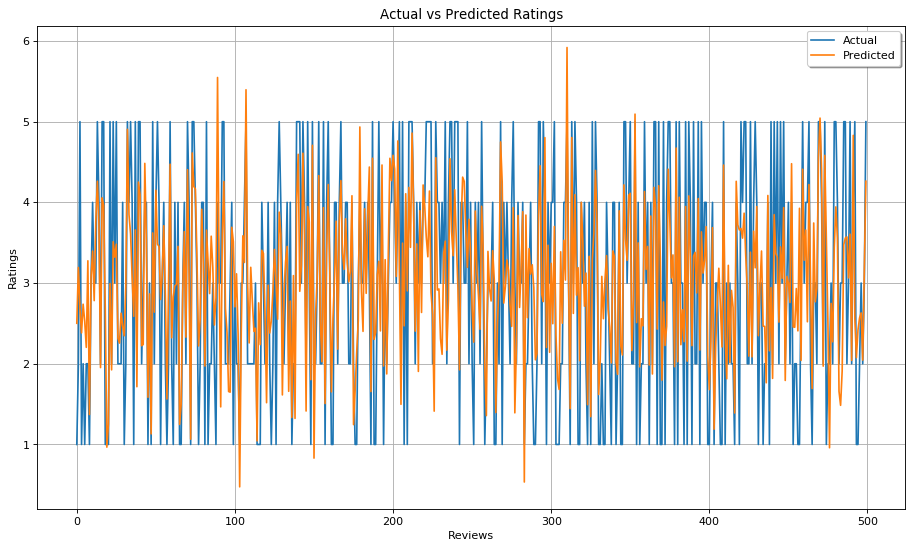

In [6]:
#graph of the first 500 ratings and predicted ratings 

x_ax = range(500)
figure(figsize=(14, 8), dpi=80)
plt.plot(x_ax, y_test[:500], label="Actual")
plt.plot(x_ax, y_pred_reg[:500], label="Predicted")
plt.title("Actual vs Predicted Ratings")
plt.xlabel('Reviews')
plt.ylabel('Ratings')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [37]:
# new review examples
s = ['this fish taste really good','this taste terrible', 'i do not like this','coffee', 'love it' ]
a = tf.transform(s)
regr.predict(a)

array([3.52671011, 1.2119532 , 1.72282555, 3.29208979, 5.30086651])

## Random Forest (similar results to MNB) 

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# parameters ={
#     'n_estimators': [50,100,200,300],
#     'max_depth':[10, 20, 50]
# }

# rf = RandomizedSearchCV(RandomForestClassifier(bootstrap=True, criterion='entropy'), parameters,cv=5, return_train_score=False, n_iter = 5)
# rf.fit(X_train, y_train)

# dump(rf, open('Tfidf_rf.pkl', 'wb'))

In [12]:
#load trained rf model 

rf = load(open('Tfidf_rf.pkl', 'rb'))
y_pred_rf = rf.predict(X_test)
rf_results = classification_report(y_test,y_pred_rf,digits=4)
print(rf.best_params_, rf.best_score_, rf_results)

{'n_estimators': 100, 'max_depth': 50} 0.500325               precision    recall  f1-score   support

         1.0     0.5724    0.6228    0.5965      3987
         2.0     0.4278    0.4007    0.4138      3978
         3.0     0.4973    0.3448    0.4073      4002
         4.0     0.4703    0.4538    0.4619      4015
         5.0     0.5217    0.6864    0.5928      4018

    accuracy                         0.5019     20000
   macro avg     0.4979    0.5017    0.4945     20000
weighted avg     0.4979    0.5019    0.4945     20000



[[2483  775  200  164  365]
 [1087 1594  578  321  398]
 [ 437  878 1380  750  557]
 [ 187  307  490 1822 1209]
 [ 144  172  127  817 2758]]


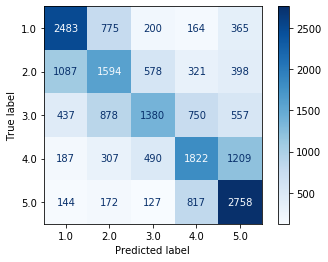

In [13]:
#plot confusion matrix 

class_names = test['overall'].unique().sort()

disp_rf = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, values_format = '.0f'
                                )
print(disp_rf.confusion_matrix)

## Treat it as two-class classification (ratings 1,2 are class 0, ratings 4,5 are class 1)

In [12]:
#load the data 

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [13]:
# assign a positive sentiment to ratings greater than 3, negative sentimen to ratings less than that 

train['class'] = np.where(train['overall'] > 3,1,0)
train = train[train['overall'] != 3]


test['class'] = np.where(test['overall'] > 3,1,0)
test = test[test['overall'] != 3]

In [14]:
tf2 = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_features=3000) # number of n-grams, use both 1-gram and bi-grams
tfidf_data2 = tf2.fit_transform(train['clean2'])
tfidf_train2 = pd.DataFrame(tfidf_data2.toarray(), columns=tf2.get_feature_names())

data_tf2_test = tf2.transform(test['clean2'])
tf_test2 = pd.DataFrame(data_tf2_test.toarray(), columns=tf2.get_feature_names())

In [15]:
# Define training data 
X_train = tfidf_train2
y_train = train['class']

X_test = tf_test2
y_test = test['class']

In [16]:
# train mnb model 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [17]:
# test mnb model and results 
y_pred_mnb = mnb.predict(X_test)
mnb_results = classification_report(y_test,y_pred_mnb,digits=4)
print(mnb_results)

              precision    recall  f1-score   support

           0     0.8541    0.8728    0.8633      7965
           1     0.8711    0.8521    0.8615      8033

    accuracy                         0.8624     15998
   macro avg     0.8626    0.8625    0.8624     15998
weighted avg     0.8626    0.8624    0.8624     15998

